In [63]:
from google.cloud import vision
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

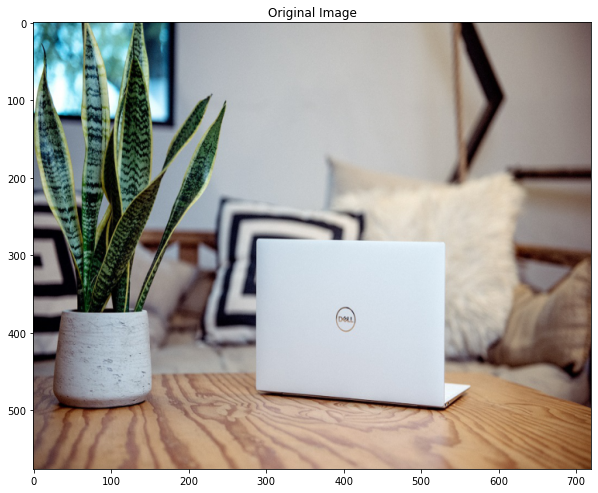

In [64]:
img1 = cv2.imread("object-1.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img, (720,576), interpolation = cv2.INTER_AREA)
plt.figure(figsize = (10,10))
plt.title("Original Image")
plt.imshow(img)
#Image credits - @bel2000a - Unsplash

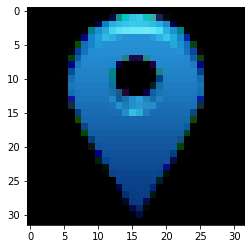

In [65]:
pointeralpa = cv2.imread("map-pointer-icon.png",-1)

pointerorg = pointeralpa[:,:,0:3]

pointerorg = cv2.cvtColor(pointerorg,cv2.COLOR_BGR2RGB)

pointermask = pointeralpa[:,:,3]

pointerblackimage = cv2.merge((pointermask,pointermask,pointermask))

pointerblackaug = cv2.bitwise_and(pointerorg,pointerblackimage)

plt.imshow(pointerblackaug )

In [66]:
!ls ~/.jsonkey/vision-api-sa.json

/home/jupyter/.jsonkey/vision-api-sa.json


In [67]:
# Service account key path
credential_path = "/home/jupyter/.jsonkey/vision-api-sa.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [68]:
def detect_objects(img):
    client = vision.ImageAnnotatorClient()
    objectResponse = client.object_localization(image=img).localized_object_annotations
    return objectResponse

In [69]:
def plot_object_annotations(imagefile):
    with open(imagefile, 'rb') as image_file:
        content = image_file.read()
    img = vision.Image(content=content)
    oresp = detect_crops(img)
    cv2img = cv2.imread(imagefile)
    cv2img = cv2.cvtColor(cv2img, cv2.COLOR_BGR2RGB)
    cv2img = cv2.resize(cv2img, (720,576), interpolation = cv2.INTER_AREA)
    shape = cv2img.shape
    for object_ in oresp:
        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        objvertices =(['({},{})'.format(round(vertex.x*shape[1]),round(vertex.y*shape[0])) for vertex in object_.bounding_poly.normalized_vertices])
        print('objbounds:{}'.format(','.join(objvertices)))
        objbounds = eval((','.join(objvertices))) 
        xCenter = (objbounds[0][0] + objbounds[1][0]) / 2
        yCenter = (objbounds[2][1] + objbounds[1][1]) / 2
        print(xCenter,yCenter)
        x1 = int(xCenter-16)
        x2 = int(xCenter+16)
        y1 = int(yCenter-16)
        y2 = int(yCenter+16)
        print(y1,y2,x1,x2)
        print(cv2img.shape)
        cv2imgROI = cv2img.copy()
        cv2imgROI = cv2imgROI[y1:y2,x1:x2]
        cv2imgROIImage = cv2.bitwise_and(cv2imgROI,cv2.bitwise_not(pointerblackimage))
        cv2imgROIFinal = cv2.bitwise_or(cv2imgROIImage , pointerblackaug)
        cv2img[y1:y2,x1:x2] = cv2imgROIFinal
        cv2.putText(cv2img, object_.name, (int(xCenter-32),int(yCenter - 32)), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,255), 2, cv2.LINE_AA)        
    plt.figure(figsize = (10,10))
    plt.imshow(cv2img)            


Laptop (confidence: 0.910422682762146)
Normalized bounding polygon vertices: 
objbounds:(284,277),(564,277),(564,499),(284,499)
424.0 388.0
372 404 408 440
(576, 720, 3)

Houseplant (confidence: 0.785044252872467)
Normalized bounding polygon vertices: 
objbounds:(3,3),(248,3),(248,499),(3,499)
125.5 251.0
235 267 109 141
(576, 720, 3)

Vase (confidence: 0.7671189904212952)
Normalized bounding polygon vertices: 
objbounds:(25,360),(155,360),(155,495),(25,495)
90.0 427.5
411 443 74 106
(576, 720, 3)

Table top (confidence: 0.7290724515914917)
Normalized bounding polygon vertices: 
objbounds:(10,420),(705,420),(705,573),(10,573)
357.5 496.5
480 512 341 373
(576, 720, 3)


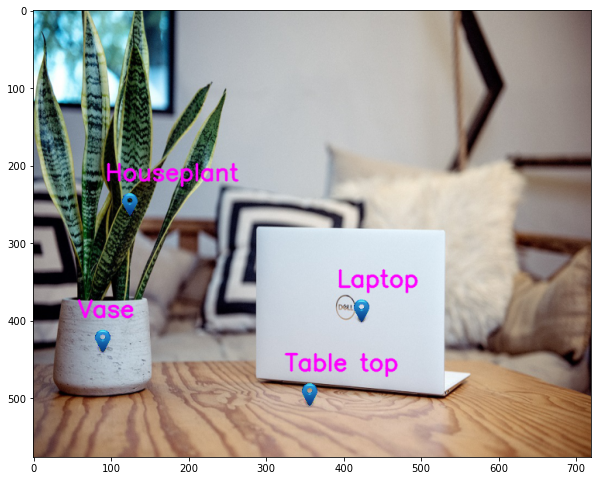

In [70]:
plot_crop_annotations('object-1.jpg')


Stool (confidence: 0.9438198208808899)
Normalized bounding polygon vertices: 
objbounds:(452,431),(554,431),(554,574),(452,574)
503.0 502.5
486 518 487 519
(576, 720, 3)

Stool (confidence: 0.9230439066886902)
Normalized bounding polygon vertices: 
objbounds:(587,433),(705,433),(705,574),(587,574)
646.0 503.5
487 519 630 662
(576, 720, 3)

Microwave oven (confidence: 0.9189658761024475)
Normalized bounding polygon vertices: 
objbounds:(262,192),(352,192),(352,251),(262,251)
307.0 221.5
205 237 291 323
(576, 720, 3)

Refrigerator (confidence: 0.8259190320968628)
Normalized bounding polygon vertices: 
objbounds:(75,125),(189,125),(189,565),(75,565)
132.0 345.0
329 361 116 148
(576, 720, 3)

Lighting (confidence: 0.8103054165840149)
Normalized bounding polygon vertices: 
objbounds:(468,2),(555,2),(555,134),(468,134)
511.5 68.0
52 84 495 527
(576, 720, 3)

Lighting (confidence: 0.7933350205421448)
Normalized bounding polygon vertices: 
objbounds:(592,2),(679,2),(679,129),(592,129)
635.5 6

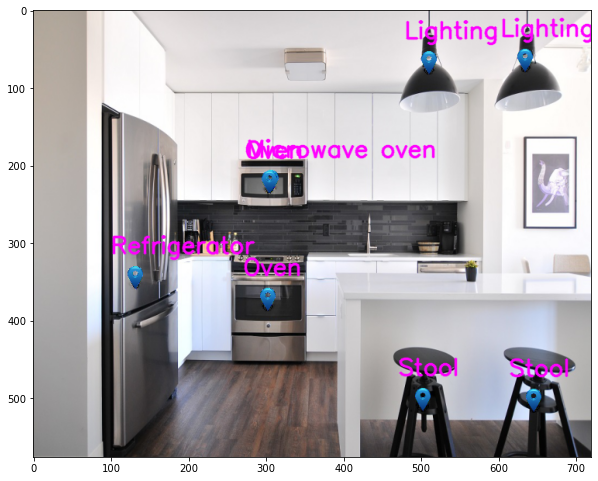

In [72]:
plot_crop_annotations('object-2.jpg')